# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Your code here. 
student_data = pd.DataFrame({"age" : [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], "tardies" : [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

In [15]:
student_data.head()

,age,tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4


Draw a dispersion diagram (scatter plot) for the data.

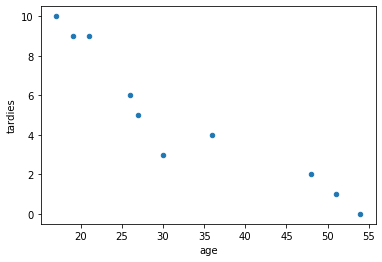

In [16]:
# Your code here.
student_data.plot.scatter(x = 'age', y = 'tardies')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [17]:
# Your response here. 

# the younger the students are, the more often they are late to class
# Generally we see a linear trend, with the number of tardies declining as age increases.


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [25]:
# Your response here.
ddof = 1

#correlation:
corr = np.corrcoef(student_data.age, student_data.tardies)
print(corr[1,0])
#print(student_data.corr())


# covariance:
cov = np.cov(student_data.age, student_data.tardies, ddof = ddof)
cov[1, 0]

# np.cov(student_data.age, student_data.tardies)[0,1]

-0.9391626886887121


-45.56666666666666

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [29]:
# Your response here.
import statsmodels.api as sm

x = sm.add_constant(student_data.age)
model = sm.OLS(student_data.tardies, x)
results = model.fit()
print(results.summary())

# for every increase in tardies in the value of 1, the age will decrease in 0,24

                            OLS Regression Results                            
Dep. Variable:                tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 21 Apr 2020   Prob (F-statistic):           5.57e-05
Time:                        16:46:44   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.0

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


Plot your regression model on your scatter plot.

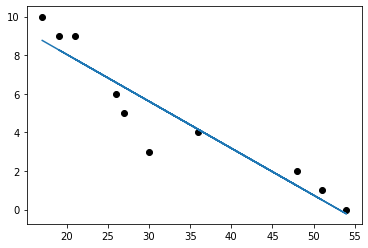

In [33]:
# Your code here.
plt.scatter(student_data.age, student_data.tardies, color = 'black');
plt.plot(student_data.age, results.predict(x));

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [34]:
# Your response here. 
# is possible to see a decrease in the tardies according to an increase in the age. 
# the data seams to have a small variance, being correct to conclude that the age is a factor of influence in tardies.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [35]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('vehicles.csv')

In [36]:
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [48]:
# Your response here. 
vehicles.corr()["CO2 Emission Grams/Mile"]

Year                      -0.222300
Engine Displacement        0.803520
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
City MPG                  -0.894139
Highway MPG               -0.926405
Combined MPG              -0.926229
CO2 Emission Grams/Mile    1.000000
Fuel Cost/Year             0.930865
Name: CO2 Emission Grams/Mile, dtype: float64

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [49]:
# Your response here. 
x = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
models = sm.OLS(vehicles['CO2 Emission Grams/Mile'], x)
results = models.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.999
Model:                                 OLS   Adj. R-squared (uncentered):              0.999
Method:                      Least Squares   F-statistic:                          6.092e+06
Date:                     Tue, 21 Apr 2020   Prob (F-statistic):                        0.00
Time:                             16:59:09   Log-Likelihood:                     -1.5250e+05
No. Observations:                    35952   AIC:                                  3.050e+05
Df Residuals:                        35947   BIC:                                  3.050e+05
Df Model:                                5                                                  
Covariance Type:                 nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Year                  0.0630      0.001     74.153      0.000       0.061       0.065
Cylinders             0.8873      0.081     10.952      0.000       0.729       1.046
Fuel Barrels/Year    19.8588      0.059    337.001      0.000      19.743      19.974
Combined MPG         -3.0509      0.043    -70.368      0.000      -3.136      -2.966
Fuel Cost/Year        0.0292      0.000     60.084      0.000       0.028       0.030
==============================================================================
Omnibus:                    72934.517   Durbin-Watson:                   0.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        287219470.909
Skew:                          16.861   Prob(JB):                         0.00
Kurtosis:                     439.575   Cond. No.                     2.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [50]:
# Your code here. 
party_data = pd.DataFrame({'invited': [1, 3, 4, 6, 8, 9, 11, 14], 'attended' : [1, 2, 4, 4, 5, 7, 8, 13]})

In [51]:
party_data.head()

,invited,attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

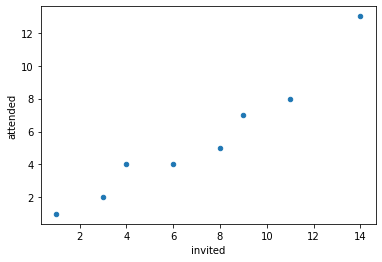

In [55]:
# Your code here.

party_data.plot.scatter(x = 'invited', y = 'attended');

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

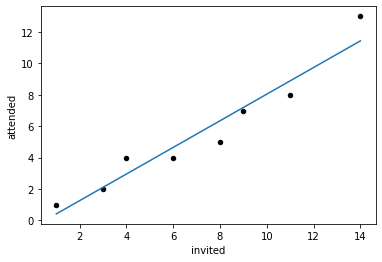

In [63]:
# Your response here. 
x = sm.add_constant(party_data.invited)
model = sm.OLS(party_data.attended, x)
results = model.fit()
results.summary()

party_data.plot.scatter(x = 'invited', y = 'attended', color = 'black');
plt.plot(party_data.invited, results.predict(x));

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [59]:
# Your response here. 
party_data2 = pd.DataFrame({'invited': [1, 3, 4, 6, 8, 9, 11], 'attended' : [1, 2, 4, 4, 5, 7, 8]})

x = sm.add_constant(party_data2.invited)
model = sm.OLS(party_data2.attended, x)
results = model.fit()
results.summary()

C:\Anaconda\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               attended   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     83.31
Date:                Tue, 21 Apr 2020   Prob (F-statistic):           0.000264
Time:                        17:31:58   Log-Likelihood:                -5.7771
No. Observations:                   7   AIC:                             15.55
Df Residuals:                       5   BIC:                             15.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3233      0.513      0.630      0.556      -0.996       1.642
invited        0.6842      0.075      9.127      0.000       0.492       0.877
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.689
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.379
Skew:                           0.284   Prob(JB):                        0.827
Kurtosis:                       2.012   Cond. No.                         14.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

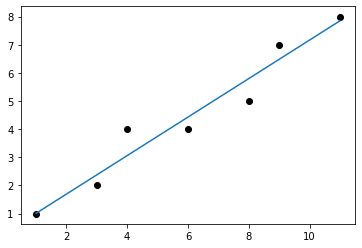

In [61]:
plt.scatter(party_data2.invited, party_data2.attended, color = 'black');
plt.plot(party_data2.invited, results.predict(x))

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 